## Lead Scoring Case Study : Python Notebook

#### Problem Statement:

An education company named X Education sells online courses to industry working professionals.It markets its courses across various digital campaigns/ platforms. Objective of the campaigns is to drive traffic to the website and impress upon them to fill up a form providing email address and phone number by which they are classified as Leads.The lead conversion rate at X Education is currently very poor (around 30%).

#### Goal of the Project:

To build a logistic regression model to assign a lead score between 0 and 100 to each of the leads. So that the company can target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.Using this model,company wants to achieve lead conversion rate to be around 80%.


### 1. Data Cleaning

#### 1.1 Data Sourcing

In [1]:
# Importing required Python libraries


# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

# Importing data maniplation libraries
import pandas as pd
import numpy as np

# Importing Scaling library
from sklearn.preprocessing import StandardScaler


# Importing visualisation libraries
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
import seaborn as sns
%matplotlib inline

#Importing model building libraries from sklearn and statsmodel
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Importing model evaluation libraries from sklearn
from sklearn.metrics import precision_score, recall_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

# Displaying records properly
pd.options.display.max_columns =100


In [5]:
#Reading 'Leads.csv' file to pandas dataframe
leads = pd.read_csv('D:\\Machine Learning\\ML Group Case Study\\2. Lead Scoring Case Study_Data.csv')

# Displaying top 5 rows
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


####  1.2. Data Inspection

In [6]:
# Getting the number of rows and columns

leads.shape

(9240, 37)

**There are 9240 rows and 37 columns in the dataframe.** 

In [7]:
# Getting the overall info about data types and not null values 

leads.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

**Here we observe that most of the features are categorical, so we need to create dummy variables for these features after analysing them.**

**Also we observe that some columns have less than 9240 non null records, i.e. we have NULL values in the datarame.**

**As notified we have some features which are manually fed by the Sales team.Each sales person feeds these features based on their experience from the interaction with the lead. For our model, we will keep only system generated features and drops sales  features:**

- Tags
- Lead Quality
- Asymmetrique Activity Index
- Asymmetrique Profile Index
- Asymmetrique Activity Score
- Asymmetrique Profile Score
- Last Activity
- Last Notable Activity 
- Lead Profile


In [8]:
# Getting the statistical information for continuous variables

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


**We observe that 'TotalVisits','Total Time Spent on Website' and 'Page Views Per Visit' has some outliers as difference between 75% and max percentile seems too high.**

#### 1.3 Duplicate Check

In [9]:
# Check if there are any duplicate values in the dataset
leads[leads.duplicated(keep=False)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


**There are no duplicate records in the dataframe.**

#### 1.4 Class Imbalance Check

In [10]:
# Finding class imbalance
conversion = (sum(leads['Converted'])/len(leads['Converted'].index))*100
conversion

38.53896103896104

**Here, we observe that there is 38% of conversion rate. This is neither exactly 'balanced' (which a 50-50 ratio would be called) nor heavily imbalanced. So we'll not have to do any special treatment for this dataset.**

#### 1.5 Unique values check for all features

In [11]:
# Defining function for getting the record count for each valuue for each feature
def val_ct(X):
    for i in X.columns:
        print(i)
        print('---------')
        print(X[i].value_counts(normalize = True))

In [12]:
val_ct(leads)

Prospect ID
---------
53dd16bd-8201-448d-8e20-97de1cf44a7f    0.000108
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3    0.000108
910091d5-4092-4778-b9d9-d986ec8d9b17    0.000108
68ce5663-48b6-4674-9b42-f5c7cd9079d0    0.000108
9d92de15-a159-48f8-873d-03cc031d48d0    0.000108
                                          ...   
9766897f-42e0-4da5-ab63-d56914042e1e    0.000108
11321b4c-8834-4415-8a7e-cff828709441    0.000108
13f7d9cd-a47c-4024-944e-efaa1357c594    0.000108
d02605ec-9edd-4bab-ad8f-452a7d8b4c2d    0.000108
23f41d1f-986e-4513-94eb-1803cc88d399    0.000108
Name: Prospect ID, Length: 9240, dtype: float64
Lead Number
---------
608255    0.000108
596233    0.000108
656682    0.000108
592824    0.000108
652580    0.000108
            ...   
631489    0.000108
600768    0.000108
598556    0.000108
616923    0.000108
655360    0.000108
Name: Lead Number, Length: 9240, dtype: float64
Lead Origin
---------
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form     

**1. Prospect Id and Lead Number features are unique, so they are not needed while model building.So we will drop 'Lead Number' for now and keep Prospect ID for uniquely identifing the records.**

In [13]:
# Dropping unique features 'Prospect ID' and 'Lead Number' 

leads2 = leads.drop(['Lead Number'],axis = 1)

**2. We observe that below categorical features have 'Select' as one of the levels.**

- 'How did you hear about X Education'

- 'Specialization'

- 'Lead Profile'

- 'City'

**This means that the lead has not entered any data.So its better to convert them to NaN values or some other category.**

**Lets check each feature with level as 'Select' and decide the imputation technique.**

In [14]:
# Checking feature - 'How did you hear about X Education'

leads2['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

**We dont see any level like 'Not Provided', so its better to replace 'Select' with NaN value. Later we can use NULL imputation technique.**

In [15]:
leads2['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

**We dont see any level like 'Not Provided', so its better to replace 'Select' with NaN value. Later we can use NULL imputation technique.**

In [16]:
# Checking feature -  'Lead Profile'

leads2['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

**We dont see any level like 'Not Provided', so its better to replace 'Select' with NaN value. Later we can use NULL imputation technique.**

In [17]:
# Checking feature - 'City'
leads2['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

**We dont see any level like 'Not Provided', so its better to replace 'Select' with NaN value. Later we can use NULL imputation technique.**

In [18]:
# Replacing 'Select' with NaN 
leads2 = leads2.replace('Select',np.nan)

**3. For Lead source , we have 'Google' and 'google' as different levels. So we will merge 'google' data to 'Google'**

In [19]:
# Converting google to Google category
leads2 = leads2.replace('google','Google')

**4. Below features have skewed data , that means either only one level is available or has more than 95% of data as one level.**. 

- 'Do Not Call'

- 'Country'

- 'What matters most to you in choosing a course'

- 'Search'

- 'Magazine'

- 'Newspaper Article'

- 'X Education Forums'

- 'Newspaper'

- 'Digital Advertisement'

- 'Through Recommendations'

- 'Receive More Updates About Our Courses'

- 'Update me on Supply Chain Content'

- 'Get updates on DM Content'

- 'I agree to pay the amount through cheque'


**Better We can drop these features after analysing as they mostly have unique values**.  

In [20]:
# Veryfying columns with just one value,before dropping
cols = ['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']
for i in cols:
    print(i)
    print('-----------------')
    print(leads2[i].value_counts(normalize=True))

Magazine
-----------------
No    1.0
Name: Magazine, dtype: float64
Receive More Updates About Our Courses
-----------------
No    1.0
Name: Receive More Updates About Our Courses, dtype: float64
Update me on Supply Chain Content
-----------------
No    1.0
Name: Update me on Supply Chain Content, dtype: float64
Get updates on DM Content
-----------------
No    1.0
Name: Get updates on DM Content, dtype: float64
I agree to pay the amount through cheque
-----------------
No    1.0
Name: I agree to pay the amount through cheque, dtype: float64


In [21]:
#Dropping columns with just one value, as they won't be significant for further analysis.

leads2 = leads2.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis =1)

In [22]:
# Veryfying columns with skewed data ,before dropping
cols = ['Do Not Call','Country','What matters most to you in choosing a course','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations']

for i in cols:
    print(i)
    print('-----------------')
    print(leads2[i].value_counts(normalize=True))

Do Not Call
-----------------
No     0.999784
Yes    0.000216
Name: Do Not Call, dtype: float64
Country
-----------------
India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Bahrain                 0.001033
Hong Kong               0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
Nigeria                 0.000590
Canada                  0.000590
South Africa            0.000590
Germany                 0.000590
Kuwait                  0.000590
Sweden                  0.000443
Ghana                   0.000295
Philippines             0.000295
Belgium                 0.000295
China                   0.000295
Italy                   0.000295
Netherlands             0.000295
Uganda                  0.000295
Bangladesh          

In [23]:
# Dropping features with skewed data i.e. having some category for more than 95% of values

leads2 = leads2.drop(['Do Not Call','Country','What matters most to you in choosing a course','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1)

In [24]:
# Lets again check the shape of the dataframe.
leads2.shape

(9240, 22)

**Earlier we had 37 features , now we have 22 features , after removing redundant ones.**

#### 1.6 NULL values treatment

In [25]:
# getting percentage of null values in each column for leads2 dataframe
leads_null_count = (100*leads2.isnull().sum()/len(leads2))
leads_null_count

Prospect ID                                0.000000
Lead Origin                                0.000000
Lead Source                                0.389610
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Specialization                            36.580087
How did you hear about X Education        78.463203
What is your current occupation           29.112554
Tags                                      36.287879
Lead Quality                              51.590909
Lead Profile                              74.188312
City                                      39.707792
Asymmetrique Activity Index               45.649351
Asymmetrique Profile Index                45.649351
Asymmetrique Activity Score               45.649351
Asymmetrique

**Here we have some features that have very high percenatge of Null values.
Before Dropping these features, we will individally analyse each one.**

In [26]:
# Fetching columns having null values.
null_columns = leads_null_count[leads_null_count > 0]
null_columns

Lead Source                            0.389610
TotalVisits                            1.482684
Page Views Per Visit                   1.482684
Last Activity                          1.114719
Specialization                        36.580087
How did you hear about X Education    78.463203
What is your current occupation       29.112554
Tags                                  36.287879
Lead Quality                          51.590909
Lead Profile                          74.188312
City                                  39.707792
Asymmetrique Activity Index           45.649351
Asymmetrique Profile Index            45.649351
Asymmetrique Activity Score           45.649351
Asymmetrique Profile Score            45.649351
dtype: float64

**Now we can see that there are some features which have null values , ranging between (0,78).** 

**Our next step would be to drop these features which have high percentage of NULL values ( more than 40 % ) and Impute other features which have less percentage of NULL values, with best possible means.**


In [27]:
# getting percentage of null values in each column for leads2 dataframe
leads_null_count = (100*leads2.isnull().sum()/len(leads2))
leads_null_count

# Fetching columns having null values.
null_columns = leads_null_count[leads_null_count >= 45]
null_columns

How did you hear about X Education    78.463203
Lead Quality                          51.590909
Lead Profile                          74.188312
Asymmetrique Activity Index           45.649351
Asymmetrique Profile Index            45.649351
Asymmetrique Activity Score           45.649351
Asymmetrique Profile Score            45.649351
dtype: float64

**We will drop these features as these have high percentage of NULL values.**

In [28]:
# Dropping these featuures with more than 45 % of values
leads2 = leads2.drop(['How did you hear about X Education','Lead Profile','Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis = 1)

In [29]:
# getting percentage of null values in each column for leads2 dataframe
leads2_null_count = (100*leads2.isnull().sum()/len(leads2))
leads2_null_count[leads2_null_count > 0]

Lead Source                         0.389610
TotalVisits                         1.482684
Page Views Per Visit                1.482684
Last Activity                       1.114719
Specialization                     36.580087
What is your current occupation    29.112554
Tags                               36.287879
City                               39.707792
dtype: float64

**Dropping the features derived from Sales Team**

In [30]:
# Dropping the features which are derived from Sales Team
leads2 = leads2.drop(['Tags','Last Activity','Last Notable Activity'],axis = 1)

In [31]:
# getting percentage of null values in each column for leads2 dataframe
leads2_null_count = (100*leads2.isnull().sum()/len(leads2))
leads2_null_count[leads2_null_count > 0]

Lead Source                         0.389610
TotalVisits                         1.482684
Page Views Per Visit                1.482684
Specialization                     36.580087
What is your current occupation    29.112554
City                               39.707792
dtype: float64

In [32]:
# Analysing feature 'What is your current occupation' before imputing NULL values 
leads2['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

In [33]:
# Most of the values are unemployed so null values can be imputed with Unemployed or mode value

leads2['What is your current occupation'] = leads2['What is your current occupation'].replace(np.nan, 'Unemployed')

In [34]:
# Analysing feature 'Specialization' before imputing NULL values 
leads2['Specialization'].value_counts(normalize=True,dropna= False)

NaN                                  0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Media and Advertising                0.021970
Travel and Tourism                   0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

In [35]:
#Replacing NULL values with mode
leads2['Specialization'] = leads2['Specialization'].replace(np.nan, 'Others')


In [36]:
# Analysing feature 'City' before imputing NULL values 
leads2['City'].value_counts(normalize = True)

Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64

In [37]:
# Replacing the NULL values with the mode value
leads2['City'].fillna(leads2['City'].mode()[0], inplace=True)

In [38]:
# getting percentage of null values in each column for leads2 dataframe
leads2_null_count = (100*leads2.isnull().sum()/len(leads2))
leads2_null_count[leads2_null_count > 0]

Lead Source             0.389610
TotalVisits             1.482684
Page Views Per Visit    1.482684
dtype: float64

**Since these features have around 1 % Null values , we can impute these with mean/median/mode**

In [39]:
# Analysing feature 'Lead Source' before imputing NULL values 
leads2['Lead Source'].value_counts(normalize = True,dropna= False)

Google               0.310931
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
NaN                  0.003896
bing                 0.000649
Click2call           0.000433
Press_Release        0.000216
Social Media         0.000216
Live Chat            0.000216
NC_EDM               0.000108
WeLearn              0.000108
testone              0.000108
blog                 0.000108
youtubechannel       0.000108
welearnblog_Home     0.000108
Pay per Click Ads    0.000108
Name: Lead Source, dtype: float64

In [40]:
# Replacing the NULL values with the mode value
leads2['Lead Source'].fillna(leads2['Lead Source'].mode()[0], inplace=True)

**'TotalVisits' and 'Page Views Per Visit' are numerical features. Before imputing with median/mode we need to check for outliers.If it has outliers then we need to impute with Median otherwise with Mean.**

<AxesSubplot:ylabel='TotalVisits'>

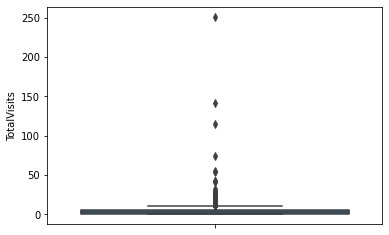

In [41]:
# Checking for outliers for 'TotalVisits'
sns.boxplot(y = 'TotalVisits', data = leads2)

<AxesSubplot:ylabel='Page Views Per Visit'>

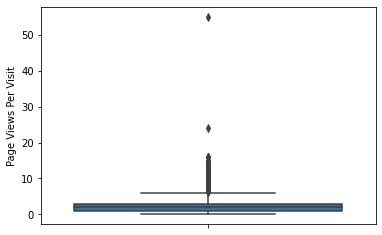

In [42]:
# Checking for outliers for 'Page Views Per Visit'
sns.boxplot(y = 'Page Views Per Visit', data = leads2)

**Both features have outliers , so we will impute them with median, instead of mean**

In [43]:
# Imputing Null values of 'TotalVisits' with median
leads2['TotalVisits'].fillna(leads2['TotalVisits'].median(), inplace=True)

In [44]:
# Imputing Null values of 'Page Views Per Visit' with median
leads2['Page Views Per Visit'].fillna(leads2['Page Views Per Visit'].median(), inplace=True)

In [45]:
# getting percentage of null values in each column for leads2 dataframe
leads2_null_count = (100*leads2.isnull().sum()/len(leads2))
leads2_null_count[leads2_null_count > 0]

Series([], dtype: float64)

**So we have dealt with NULL values successfully. We will now do outlier treatment.**

#### 1.7 Outlier Treatment

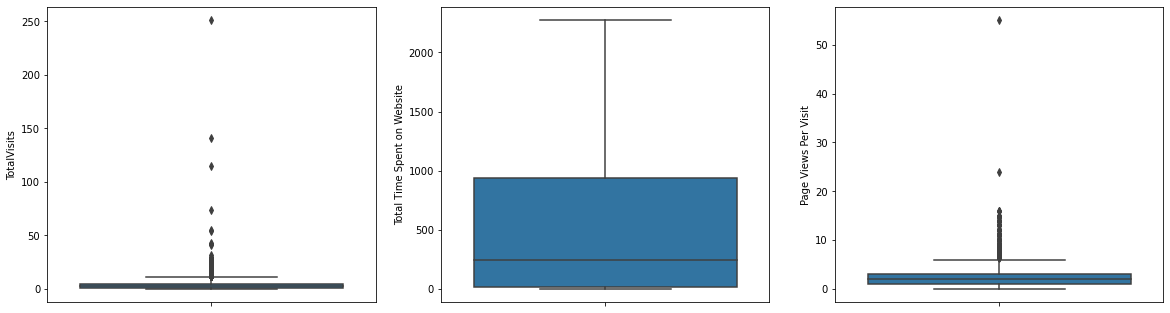

In [46]:
# Checking for the outliers in all the numeric columns

plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits',  data = leads2)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', data = leads2)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', data = leads2)
plt.show()

**Here we observe that 'Total Visits' and 'Page Views per Visit' have outliers.So we will replace the outliers with IQR.**

In [47]:
#Removing outliers for'TotalVisits' 

Q1 = leads2['TotalVisits'].quantile(0.25)
Q3 = leads2['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
leads2 = leads2[~((leads2['TotalVisits'] < (Q1 - 1.5 * IQR)) |(leads2['TotalVisits']> (Q3 + 1.5 * IQR)))]

# Getting the number of rows after removing the outliers
print(leads2.shape)

(8973, 12)


In [48]:
#Removing outliers for'Page Views Per Visit' 

Q1 = leads2['Page Views Per Visit'].quantile(0.25)
Q3 = leads2['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
leads2 = leads2[~((leads2['Page Views Per Visit'] < (Q1 - 1.5 * IQR)) |(leads2['Page Views Per Visit']> (Q3 + 1.5 * IQR)))]

# Getting the number of rows after removing the outliers
print(leads2.shape)

(8679, 12)


#### 1.8 Checking the percenatge of rows retained after data cleaning process

In [49]:
#Checking the percenatge of rows retained after data cleaning process
((leads2.shape[0])/leads.shape[0])*100

93.92857142857143

**Around 94 % of rows have been retained, so its good to proceed further.**

### 2. Data Visualisation

#### 2.1 Univariate Analysis for Categorical Features

In [50]:
# function to check the distribution of categorical variables
def cat_plot(var):
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    sns.countplot(var, hue = leads2['Converted'],data=leads2)
    plt.title('Distribution of '+ '%s' %var +' VS CONVERTED', fontsize=14)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('COUNT')

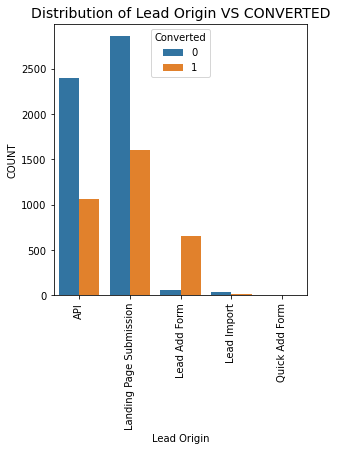

In [51]:
#Plotting Lead Origin against target feature
cat_plot('Lead Origin')

**From the above graph,  we can observe that:** 

- The maximum conversion happened from the 'Landing Page Submission'. 

- API and Landing Page Submission bring higher number of leads as well as conversion.

- Lead Add Form has a very high conversion rate but count of leads are not very high.

- Lead Import and Quick Add Form get very few leads.

**So, Business should focus on improving lead conversion of API and Landing Page Submission origin,as we get higher number of people from these origins. Also business can generate more leads from Lead Add Form.**

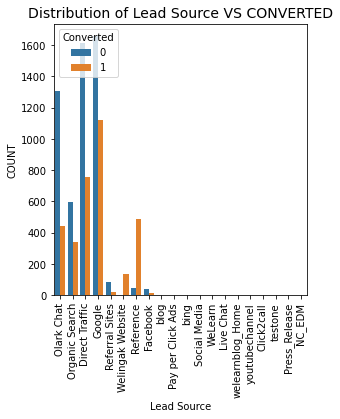

In [52]:
#Plotting Lead Source against target feature
cat_plot('Lead Source')

**From the above graph,we can observe that :**

- Major conversion of lead is from the Google source

- Maximum number of leads are generated by 'Google' and 'Direct traffic','Organic Searc','Olark Chat'.

- Conversion Rate of 'Reference' leads and 'Welingak Website' leads is high.

**So Business should focus on improving overall lead conversion rate of leads from sources- olark chat, organic search, direct traffic, and google leads and generate more leads from Reference and Welingak Website.**

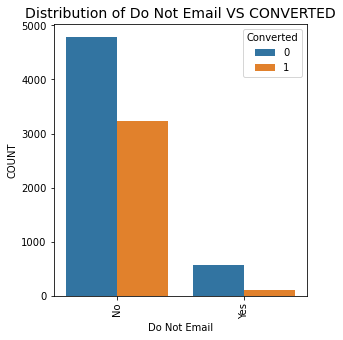

In [53]:
#Plotting Do Not Email against target feature
cat_plot('Do Not Email')

**From the above graph, major conversion has happend  for the leads which agreed to receive emails.So Business should focus on improving leads conversion for leads which agree on getting emails.**

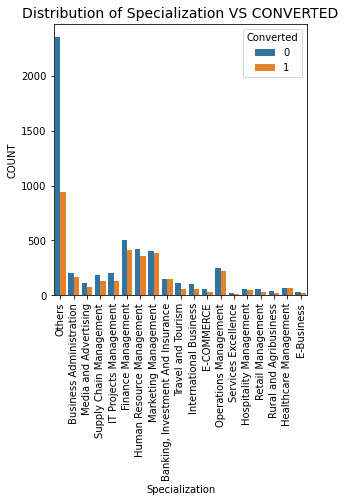

In [54]:
#Plotting Specialization against target feature
cat_plot('Specialization')

**From the above graph we observe that:**

- 'Others' Specialisation which was NULL initially, have more leads. This means that leads should be asked to enter          specialisation .
    
- 'Finance Management','Human Resource Management','Marketing Management','Operations Management' get maximum number of leads.And their conversion rate is also good.
    
- 'Operations Management also has good lead conversion rate.
    
- 'Healthcare Management also has good lead conversion rate.
    
    
**So Business should focus on  gettimg more leads and good conversion rates for all kinds of 'Management Specialisation'**  

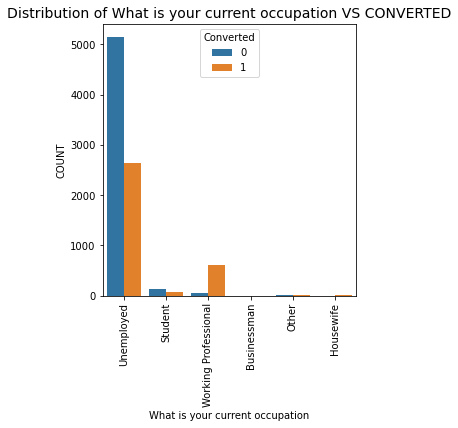

In [55]:
#Plotting What is your current occupation against target feature
cat_plot('What is your current occupation')

**From the above graph , we can observe that :**

- Unemployed section gets more leads and also as good lead conversion rate.

- Working Professional has higher lead conversion rate.

- Housewife also has good conversion rate.

**So business should focus on getting more conversion of leads from 'Unemployed' section. And more number of leads should be generated  for 'Working Professional','Student' and 'Housewife'**


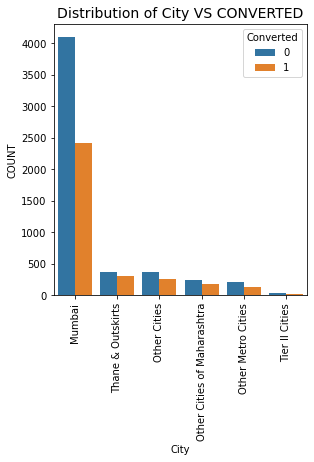

In [56]:
#Plotting City against target feature
cat_plot('City')

**From the above graph we can observe that different cities of 'Maharashtra' gets the more leads and conversion rate is also high.**


**So Business should focus on higher conversion rate for 'Mumbai' and  getting more leads from Thane and other cities of Maharashtra**


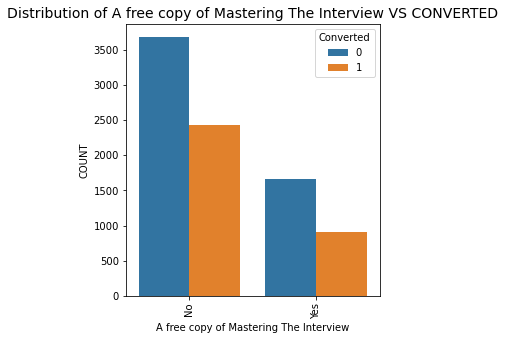

In [57]:
#Plotting A free copy of Mastering The Interview against target feature
cat_plot('A free copy of Mastering The Interview')

**From the above graph we can observe that:**

**Number of leads and lead conversion rate is high for leads who do not want a free copy of Mastering Interviews.**

#### 2.2 Univariate Analysis for Numerical Features

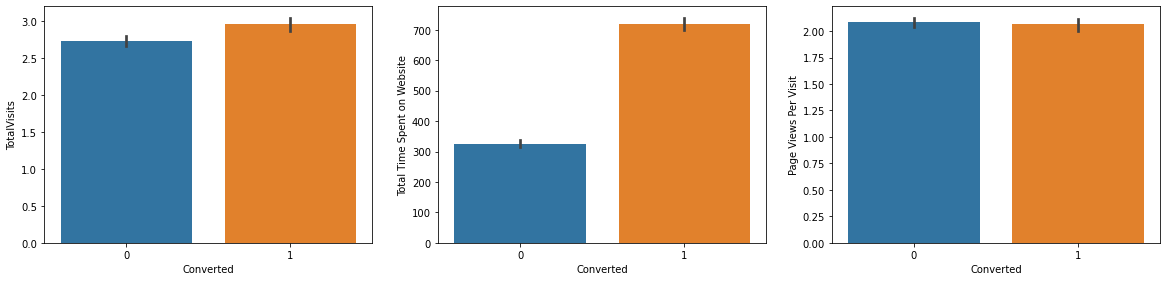

In [58]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', data = leads2)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted',  data = leads2)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', data = leads2)
plt.show()

**From the above graph we can observe that**

- The conversion rate are high for leads with more number of 'Total Visits', and more amount of  'Total Time Spent on Website'. 

- 'Page Views Per Visit' seems to have same number of leads from converted and non converted leads.


**So business should focus on getting the conversion of leads who spend more time on website and visit frequently.**

**Website should be made more engaging to make leads spend more time.**

#### 2.3 Finding Correlation between all features

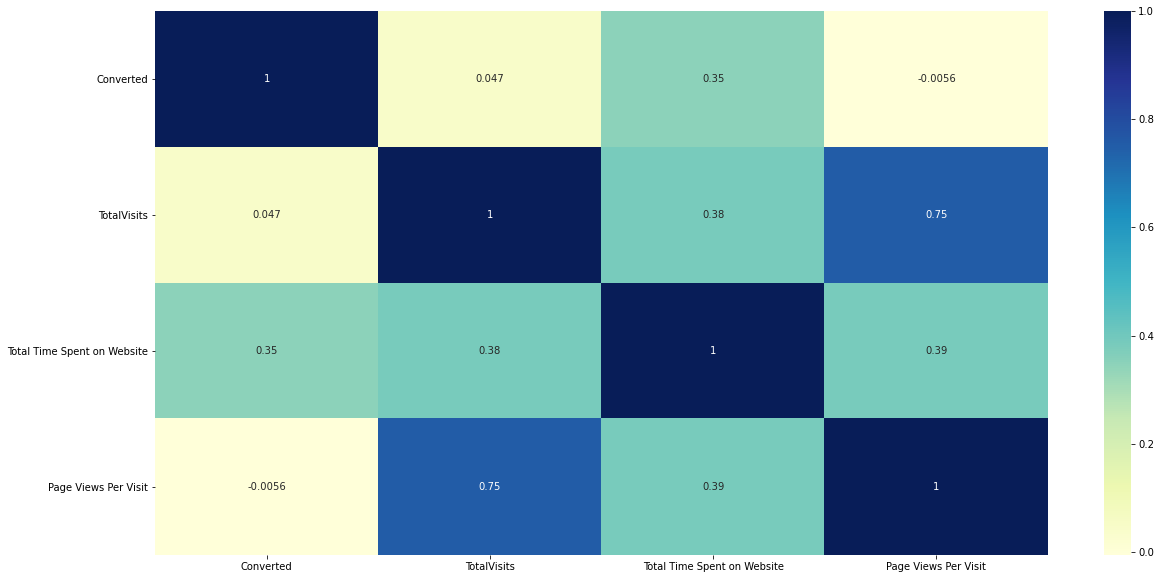

In [59]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))
sns.heatmap(leads2.corr(),annot = True,cmap="YlGnBu")
plt.show()

In [60]:
# Getting the correlation table
leads2.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.046652,0.350731,-0.005632
TotalVisits,0.046652,1.000000,0.383841,0.753189
Total Time Spent on Website,0.350731,0.383841,1.000000,0.386161
Page Views Per Visit,-0.005632,0.753189,0.386161,1.000000


**'TotalVisits' is having high positive correlation with 'Page Views Per Visit'**

**'Page Views Per Visit' is having high negative correlation with the target variable**

### 3. Data Preparation

#### 3.1 Mapping of Binary columns

**We have two features which have binary levels:**

- Do Not Email
- A free copy of Mastering The Interview

In [61]:
# Mapping 'Yes' to 1 and 'No' to 0

binary_columns = ['Do Not Email',  'A free copy of Mastering The Interview']
                                

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the columns
leads2[binary_columns] = leads2[binary_columns].apply(binary_map)

In [62]:
#Getting the top 5 rows

leads2.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,Others,Unemployed,Mumbai,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,Others,Unemployed,Mumbai,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Business Administration,Student,Mumbai,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,Others,Unemployed,Mumbai,0


#### 3.2 Dummy variables creation for categorical features

**Lets look at the categorical features again , before creating dummies.**

In [63]:
# Analysing the 'Lead Origin' feature
leads2['Lead Origin'].value_counts(normalize = True)

Landing Page Submission    0.513078
API                        0.398433
Lead Add Form              0.082152
Lead Import                0.006222
Quick Add Form             0.000115
Name: Lead Origin, dtype: float64

In [64]:
# Analysing the 'Lead Source' feature
leads2['Lead Source'].value_counts(normalize = True)

Google               0.319507
Direct Traffic       0.272842
Olark Chat           0.201406
Organic Search       0.107962
Reference            0.061182
Welingak Website     0.016246
Referral Sites       0.012213
Facebook             0.006222
bing                 0.000691
Click2call           0.000346
Social Media         0.000230
Live Chat            0.000230
testone              0.000115
Press_Release        0.000115
blog                 0.000115
youtubechannel       0.000115
NC_EDM               0.000115
WeLearn              0.000115
welearnblog_Home     0.000115
Pay per Click Ads    0.000115
Name: Lead Source, dtype: float64

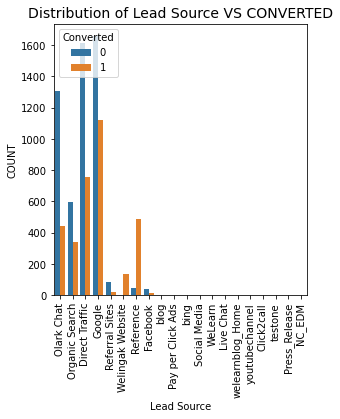

In [65]:
#Plotting distribution for 'Lead Source' with target variable.
cat_plot('Lead Source')

**We observe that the contribution of some levels are very less, we can convert them to one another level as 'Others'**

In [66]:
# Replacing low significant categories of 'Lead Source' with another category as 'Others'
leads2['Lead Source'] = leads2['Lead Source'].replace(['Pay per Click Ads','bing','blog','Social Media','WeLearn','Click2call','Live Chat','welearnblog_Home',
                                               'youtubechannel','testone','Press_Release','NC_EDM'], 'Others')

In [67]:
# getting value counts for 'What is your current occupation'
leads2['What is your current occupation'].value_counts(normalize = True)

Unemployed              0.896762
Working Professional    0.076852
Student                 0.023159
Other                   0.001498
Housewife               0.001152
Businessman             0.000576
Name: What is your current occupation, dtype: float64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

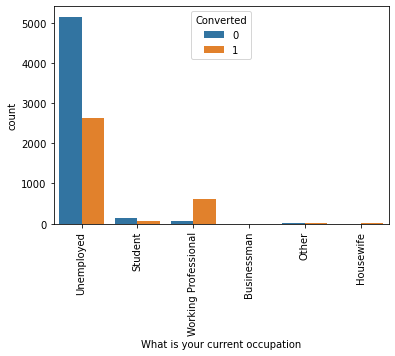

In [68]:
#Plotting distribution for "What is your current occupation" with target variable.
sns.countplot(x = "What is your current occupation", hue = "Converted", data = leads2)
xticks(rotation = 90)

In [69]:
# getting value counts for 'Specialization'
leads2['Specialization'].value_counts(normalize = True)

Others                               0.380113
Finance Management                   0.105542
Marketing Management                 0.090909
Human Resource Management            0.089872
Operations Management                0.054960
Business Administration              0.042747
IT Projects Management               0.039060
Supply Chain Management              0.036525
Banking, Investment And Insurance    0.034105
Media and Advertising                0.021201
Travel and Tourism                   0.019127
International Business               0.018896
Healthcare Management                0.016016
Hospitality Management               0.012213
E-COMMERCE                           0.011292
Retail Management                    0.010139
Rural and Agribusiness               0.007144
E-Business                           0.005991
Services Excellence                  0.004148
Name: Specialization, dtype: float64

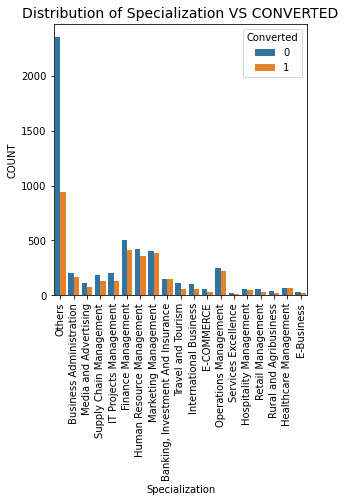

In [70]:
#Plotting distribution for 'Specialization' with target variable.
cat_plot('Specialization')

In [71]:
# Replacing low significant categories of 'Specialization' with another category as 'Others'
leads2['Specialization'] = leads2['Specialization'].replace(['Services Excellence','Retail Management',
                                                   'Hospitality Management','Rural and Agrbusiness','E-Business'], 'Others')

In [72]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(leads2[['Lead Origin', 'Lead Source',
        'What is your current occupation','City','Specialization',
       'A free copy of Mastering The Interview']], drop_first=True)

In [73]:
# Adding the results to the original dataset
leads3 = pd.concat([leads2, dummy], axis=1)

# Getting the top 5 rows
leads3.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,Others,Unemployed,Mumbai,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,Others,Unemployed,Mumbai,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Business Administration,Student,Mumbai,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,Others,Unemployed,Mumbai,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [74]:
# Dropping the repeated variables
# We have created dummies for the below variables, so we can drop them

leads3 = leads3.drop(['Lead Origin', 'Lead Source',
        'What is your current occupation','City','Specialization',
       'A free copy of Mastering The Interview'],axis=1)

In [75]:
# Checking the number of rows and columns again after dummifying the columns
leads3.shape

(8679, 42)

**After creating dummies, we have 42 features.**

### 4. Model Preparation

#### 4.1 Train-Test Split

In [76]:
# Storing the target variable to Y
Y = leads3['Converted']

In [77]:
# Dropping the target variable from dataframe
X = leads3.drop(['Converted'],axis = 1)

In [78]:
# Splitting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [79]:
# Storing Prospect ID to a new variable
Train_leads_Prospect_Id = X_train['Prospect ID']

Test_leads_Prospect_Id = X_test['Prospect ID']

# Dropping Prospect ID from the dataframe

X_train = X_train.drop('Prospect ID',axis = 1)

X_test = X_test.drop('Prospect ID',axis = 1)

#### 4.2 Scaling the Numerical features

In [80]:
#Scaling numerical features, applying fit transform
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [81]:
# Getting training dataset
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Supply Chain Management,Specialization_Travel and Tourism
5182,0,-0.744673,-0.770602,-0.650023,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8469,1,-0.332511,-0.532344,-0.045307,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8382,0,0.079651,1.685292,-0.347665,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8031,0,0.079651,-0.081485,0.559408,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6712,0,0.079651,2.942563,-0.045307,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### 5. Model Building

#### 5.1 Building Logisitc Regression model

In [82]:
# Logistic regression model
logm1 = sm.GLM(Y_train,(sm.add_constant(X_train.astype(float))), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6034
Model Family:                Binomial   Df Model:                           40
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2762.6
Date:                Mon, 17 May 2021   Deviance:                       5525.2
Time:                        20:43:52   Pearson chi2:                 7.42e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7392      1.263     -0.585      0.558      -3.214       1.735
Do Not Email                                            -1.2933      0.169     -7.631      0.000      -1.625      -0.961
TotalVisits                                              0.1629      0.050      3.237      0.001       0.064       0.262
Total Time Spent on Website                              1.0514      0.039     26.810      0.000       0.975       1.128
Page Views Per Visit                                    -0.0827      0.058     -1.425      0.154      -0.196       0.031
Lead Origin_Landing Page Submission                     -0.7040      0.126     -5.608      0.000      -0.950      -0.458
Lead Origin_Lead Add Form                                3.6686      0.489      7.498      0.000       2.710       4.628
Lead Origin_Lead Import                                  0.2016      2.264      0.089      0.929      -4.236       4.639
Lead Origin_Quick Add Form                              20.4908   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Facebook                                     0.0906      2.264      0.040      0.968      -4.347       4.528
Lead Source_Google                                       0.3123      0.095      3.276      0.001       0.125       0.499
Lead Source_Olark Chat                                   1.0421      0.152      6.851      0.000       0.744       1.340
Lead Source_Organic Search                               0.3119      0.131      2.381      0.017       0.055       0.569
Lead Source_Others                                      -0.3965      0.773     -0.513      0.608      -1.913       1.120
Lead Source_Reference                                    0.3268      0.528      0.618      0.536      -0.709       1.362
Lead Source_Referral Sites                              -0.2722      0.346     -0.787      0.431      -0.950       0.406
Lead Source_Welingak Website                             3.5806      1.117      3.207      0.001       1.392       5.769
What is your current occupation_Housewife               22.3191   1.66e+04      0.001      0.999   -3.26e+04    3.26e+04
What is your current occupation_Other                    0.3335      1.425      0.234      0.815      -2.459       3.125
What is your current occupation_Student                  0.4243      1.262      0.336      0.737      -2.050       2.898
What is your current occupation_Unemployed               0.3026      1.243      0.243      0.808      -2.134       2.740
What is your current occupation_Working Professional     3.0116      1.256      2.397      0.017       0.549       5.474
City_Other Cities                                        0

#### 5.2 Feature Selection Using RFE

In [83]:
# initialising logistic regression model
logreg = LogisticRegression()

In [84]:
# running RFE with 15 variables as output
rfe = RFE(logreg, 15)            
rfe = rfe.fit(X_train, Y_train)

In [85]:
# Getting the True/False depending on RFE support
rfe.support_

array([ True, False,  True, False,  True,  True, False, False, False,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False])

In [86]:
# Getting the columns with rfe support and ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 11),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 17),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 4),
 ('Lead Origin_Quick Add Form', False, 15),
 ('Lead Source_Facebook', False, 12),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Others', False, 2),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 3),
 ('Lead Source_Welingak Website', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 16),
 ('City_Other Cities of Maharashtra', False, 6),


In [87]:
# Getting the list of columns with RFE support
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Welingak Website',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Specialization_Others'],
      dtype='object')

#### 5.3 Rebuilding the Model with 15 features -  Model 2

In [88]:
# Rebuilding Logisitc Regression model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6059
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2772.4
Date:                Mon, 17 May 2021   Deviance:                       5544.9
Time:                        20:43:57   Pearson chi2:                 7.31e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7545      1.265     -0.597      0.551      -3.233       1.724
Do Not Email                                            -1.3011      0.168     -7.757      0.000      -1.630      -0.972
Total Time Spent on Website                              1.0580      0.039     27.226      0.000       0.982       1.134
Lead Origin_Landing Page Submission                     -0.6901      0.119     -5.803      0.000      -0.923      -0.457
Lead Origin_Lead Add Form                                3.5535      0.480      7.396      0.000       2.612       4.495
Lead Source_Google                                       0.3175      0.088      3.591      0.000       0.144       0.491
Lead Source_Olark Chat                                   0.9711      0.136      7.165      0.000       0.705       1.237
Lead Source_Organic Search                               0.3631      0.120      3.018      0.003       0.127       0.599
Lead Source_Reference                                    0.3636      0.522      0.697      0.486      -0.659       1.386
Lead Source_Welingak Website                             3.6210      1.114      3.251      0.001       1.438       5.804
What is your current occupation_Housewife               22.1934   1.65e+04      0.001      0.999   -3.23e+04    3.24e+04
What is your current occupation_Other                    0.3979      1.435      0.277      0.782      -2.415       3.210
What is your current occupation_Student                  0.3936      1.278      0.308      0.758      -2.112       2.899
What is your current occupation_Unemployed               0.2744      1.260      0.218      0.828      -2.195       2.744
What is your current occupation_Working Professional     2.9787      1.273      2.340      0.019       0.484       5.474
Specialization_Others                                   -1.1046      0.105    -10.476      0.000      -1.311      -0.898
========================================================================================================================
"""

In [89]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,16.88
12,What is your current occupation_Unemployed,14.53
7,Lead Source_Reference,13.42
2,Lead Origin_Landing Page Submission,6.36
8,Lead Source_Welingak Website,4.57
14,Specialization_Others,3.92
5,Lead Source_Olark Chat,3.24
4,Lead Source_Google,2.35
13,What is your current occupation_Working Profes...,2.08
6,Lead Source_Organic Search,1.46


**Removing column 'Lead Origin_Lead Add Form' as it has high VPF and hence it's insignificant.**

In [90]:
# Dropping column 'Lead Origin_Lead Add Form'
col = col.drop('Lead Origin_Lead Add Form',1)

#### 5.4 Rebuilding the Model with 14 features -  Model 3

In [91]:
# Rebuilding Logistic Regression model
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6060
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2804.9
Date:                Mon, 17 May 2021   Deviance:                       5609.8
Time:                        20:44:00   Pearson chi2:                 7.33e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6579      1.264     -0.521      0.603      -3.135       1.819
Do Not Email                                            -1.1654      0.163     -7.171      0.000      -1.484      -0.847
Total Time Spent on Website                              1.0304      0.038     26.907      0.000       0.955       1.105
Lead Origin_Landing Page Submission                     -0.7779      0.118     -6.618      0.000      -1.008      -0.548
Lead Source_Google                                       0.3301      0.088      3.769      0.000       0.158       0.502
Lead Source_Olark Chat                                   0.8500      0.133      6.390      0.000       0.589       1.111
Lead Source_Organic Search                               0.3191      0.119      2.675      0.007       0.085       0.553
Lead Source_Reference                                    3.7883      0.236     16.041      0.000       3.325       4.251
Lead Source_Welingak Website                             7.0180      1.014      6.921      0.000       5.030       9.006
What is your current occupation_Housewife               22.1943   1.65e+04      0.001      0.999   -3.24e+04    3.24e+04
What is your current occupation_Other                    0.3691      1.436      0.257      0.797      -2.445       3.183
What is your current occupation_Student                  0.3771      1.278      0.295      0.768      -2.127       2.881
What is your current occupation_Unemployed               0.2719      1.260      0.216      0.829      -2.197       2.741
What is your current occupation_Working Professional     2.9659      1.272      2.331      0.020       0.472       5.460
Specialization_Others                                   -1.0989      0.105    -10.498      0.000      -1.304      -0.894
========================================================================================================================
"""

In [92]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,14.43
2,Lead Origin_Landing Page Submission,6.30
13,Specialization_Others,3.92
4,Lead Source_Olark Chat,3.21
3,Lead Source_Google,2.35
12,What is your current occupation_Working Profes...,2.07
6,Lead Source_Reference,1.80
5,Lead Source_Organic Search,1.45
10,What is your current occupation_Student,1.36
1,Total Time Spent on Website,1.27


**Removing column 'What is your current occupation_Housewife' as it has a high p value,so it's insignificant.**

In [93]:
# Dropping column 'What is your current occupation_Housewife'
col = col.drop('What is your current occupation_Housewife',1)

#### 5.4 Rebuilding the Model with 13 features -  Model 4

In [94]:
# Rebuilding Logistic Regression model
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6061
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2806.7
Date:                Mon, 17 May 2021   Deviance:                       5613.4
Time:                        20:44:03   Pearson chi2:                 7.33e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8556      0.912      0.938      0.348      -0.933       2.644
Do Not Email                                            -1.1654      0.162     -7.172      0.000      -1.484      -0.847
Total Time Spent on Website                              1.0300      0.038     26.898      0.000       0.955       1.105
Lead Origin_Landing Page Submission                     -0.7749      0.117     -6.597      0.000      -1.005      -0.545
Lead Source_Google                                       0.3325      0.087      3.800      0.000       0.161       0.504
Lead Source_Olark Chat                                   0.8501      0.133      6.391      0.000       0.589       1.111
Lead Source_Organic Search                               0.3176      0.119      2.662      0.008       0.084       0.551
Lead Source_Reference                                    3.7893      0.236     16.047      0.000       3.326       4.252
Lead Source_Welingak Website                             7.0201      1.014      6.923      0.000       5.033       9.008
What is your current occupation_Other                   -1.1461      1.137     -1.008      0.314      -3.375       1.083
What is your current occupation_Student                 -1.1386      0.929     -1.226      0.220      -2.959       0.681
What is your current occupation_Unemployed              -1.2438      0.904     -1.376      0.169      -3.015       0.527
What is your current occupation_Working Professional     1.4496      0.921      1.574      0.115      -0.355       3.254
Specialization_Others                                   -1.0989      0.105    -10.507      0.000      -1.304      -0.894
========================================================================================================================
"""

In [95]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,14.25
2,Lead Origin_Landing Page Submission,6.23
12,Specialization_Others,3.91
4,Lead Source_Olark Chat,3.19
3,Lead Source_Google,2.34
11,What is your current occupation_Working Profes...,2.05
6,Lead Source_Reference,1.77
5,Lead Source_Organic Search,1.45
9,What is your current occupation_Student,1.35
1,Total Time Spent on Website,1.27


**Dropping feature 'What is your current occupation_Other' as it has high p value, so it's insignificant.**

In [96]:
# Dropping column ' LWhat is your current occupation_Other'
col = col.drop('What is your current occupation_Other',1)

#### 5.5 Rebuilding the Model with 12 features -  Model 5

In [97]:
# Rebuilding Logistic Regression model
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6062
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2807.2
Date:                Mon, 17 May 2021   Deviance:                       5614.5
Time:                        20:44:06   Pearson chi2:                 7.34e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1603      0.549      0.292      0.770      -0.917       1.237
Do Not Email                                            -1.1684      0.163     -7.186      0.000      -1.487      -0.850
Total Time Spent on Website                              1.0297      0.038     26.896      0.000       0.955       1.105
Lead Origin_Landing Page Submission                     -0.7712      0.117     -6.567      0.000      -1.001      -0.541
Lead Source_Google                                       0.3336      0.087      3.813      0.000       0.162       0.505
Lead Source_Olark Chat                                   0.8517      0.133      6.403      0.000       0.591       1.112
Lead Source_Organic Search                               0.3175      0.119      2.663      0.008       0.084       0.551
Lead Source_Reference                                    3.7944      0.236     16.075      0.000       3.332       4.257
Lead Source_Welingak Website                             7.0217      1.014      6.924      0.000       5.034       9.009
What is your current occupation_Student                 -0.4473      0.581     -0.770      0.441      -1.585       0.691
What is your current occupation_Unemployed              -0.5523      0.539     -1.024      0.306      -1.610       0.505
What is your current occupation_Working Professional     2.1411      0.568      3.771      0.000       1.028       3.254
Specialization_Others                                   -1.0962      0.105    -10.483      0.000      -1.301      -0.891
========================================================================================================================
"""

In [98]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,14.07
2,Lead Origin_Landing Page Submission,6.17
11,Specialization_Others,3.90
4,Lead Source_Olark Chat,3.17
3,Lead Source_Google,2.32
10,What is your current occupation_Working Profes...,2.04
6,Lead Source_Reference,1.76
5,Lead Source_Organic Search,1.44
8,What is your current occupation_Student,1.35
1,Total Time Spent on Website,1.26


**Dropping feature 'What is your current occupation_Unemployed' as it has high VIF value, so it's insignificant.**

In [99]:
# Dropping column ' Last Notable Activity_Had a Phone Conversation'
col = col.drop('What is your current occupation_Unemployed',1)

#### 5.6 Rebuilding the Model with 11 features -  Model 6

In [100]:
# Rebuilding Logistic Regression model
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6063
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2807.8
Date:                Mon, 17 May 2021   Deviance:                       5615.5
Time:                        20:44:10   Pearson chi2:                 7.34e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3851      0.132     -2.916      0.004      -0.644      -0.126
Do Not Email                                            -1.1673      0.162     -7.185      0.000      -1.486      -0.849
Total Time Spent on Website                              1.0307      0.038     26.928      0.000       0.956       1.106
Lead Origin_Landing Page Submission                     -0.7755      0.117     -6.610      0.000      -1.005      -0.546
Lead Source_Google                                       0.3325      0.087      3.802      0.000       0.161       0.504
Lead Source_Olark Chat                                   0.8515      0.133      6.403      0.000       0.591       1.112
Lead Source_Organic Search                               0.3179      0.119      2.666      0.008       0.084       0.552
Lead Source_Reference                                    3.7958      0.236     16.085      0.000       3.333       4.258
Lead Source_Welingak Website                             7.0205      1.014      6.923      0.000       5.033       9.008
What is your current occupation_Student                  0.1028      0.220      0.467      0.640      -0.329       0.534
What is your current occupation_Working Professional     2.6911      0.184     14.604      0.000       2.330       3.052
Specialization_Others                                   -1.1015      0.104    -10.543      0.000      -1.306      -0.897
========================================================================================================================
"""

In [101]:
# Rebuilding Logistic Regression model
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6063
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2807.8
Date:                Mon, 17 May 2021   Deviance:                       5615.5
Time:                        20:44:11   Pearson chi2:                 7.34e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3851      0.132     -2.916      0.004      -0.644      -0.126
Do Not Email                                            -1.1673      0.162     -7.185      0.000      -1.486      -0.849
Total Time Spent on Website                              1.0307      0.038     26.928      0.000       0.956       1.106
Lead Origin_Landing Page Submission                     -0.7755      0.117     -6.610      0.000      -1.005      -0.546
Lead Source_Google                                       0.3325      0.087      3.802      0.000       0.161       0.504
Lead Source_Olark Chat                                   0.8515      0.133      6.403      0.000       0.591       1.112
Lead Source_Organic Search                               0.3179      0.119      2.666      0.008       0.084       0.552
Lead Source_Reference                                    3.7958      0.236     16.085      0.000       3.333       4.258
Lead Source_Welingak Website                             7.0205      1.014      6.923      0.000       5.033       9.008
What is your current occupation_Student                  0.1028      0.220      0.467      0.640      -0.329       0.534
What is your current occupation_Working Professional     2.6911      0.184     14.604      0.000       2.330       3.052
Specialization_Others                                   -1.1015      0.104    -10.543      0.000      -1.306      -0.897
========================================================================================================================
"""

In [102]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Specialization_Others,2.41
4,Lead Source_Olark Chat,2.02
3,Lead Source_Google,1.67
2,Lead Origin_Landing Page Submission,1.57
1,Total Time Spent on Website,1.25
5,Lead Source_Organic Search,1.24
9,What is your current occupation_Working Profes...,1.18
6,Lead Source_Reference,1.17
0,Do Not Email,1.10
7,Lead Source_Welingak Website,1.09


**Dropping feature 'What is your current occupation_Student' as it has high VIF value, so it's insignificant.**

In [103]:
# Dropping column ' Last Notable Activity_Had a Phone Conversation'
col = col.drop('What is your current occupation_Student',1)

#### 5.7 Rebuilding the Model with 10 features -  Model 7

In [104]:
# Rebuilding Logistic Regression model
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6064
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2807.9
Date:                Mon, 17 May 2021   Deviance:                       5615.8
Time:                        20:44:14   Pearson chi2:                 7.34e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3822      0.132     -2.898      0.004      -0.641      -0.124
Do Not Email                                            -1.1679      0.162     -7.188      0.000      -1.486      -0.849
Total Time Spent on Website                              1.0307      0.038     26.927      0.000       0.956       1.106
Lead Origin_Landing Page Submission                     -0.7750      0.117     -6.605      0.000      -1.005      -0.545
Lead Source_Google                                       0.3312      0.087      3.789      0.000       0.160       0.503
Lead Source_Olark Chat                                   0.8514      0.133      6.402      0.000       0.591       1.112
Lead Source_Organic Search                               0.3165      0.119      2.655      0.008       0.083       0.550
Lead Source_Reference                                    3.7960      0.236     16.089      0.000       3.334       4.258
Lead Source_Welingak Website                             7.0177      1.014      6.921      0.000       5.030       9.005
What is your current occupation_Working Professional     2.6885      0.184     14.597      0.000       2.327       3.049
Specialization_Others                                   -1.1015      0.105    -10.540      0.000      -1.306      -0.897
========================================================================================================================
"""

In [105]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Others,2.41
4,Lead Source_Olark Chat,2.02
3,Lead Source_Google,1.67
2,Lead Origin_Landing Page Submission,1.55
1,Total Time Spent on Website,1.25
5,Lead Source_Organic Search,1.24
8,What is your current occupation_Working Profes...,1.18
6,Lead Source_Reference,1.16
0,Do Not Email,1.10
7,Lead Source_Welingak Website,1.09


**Since the Model 7 seems to be stable with significant p values and VIF values, we shall go ahead with this model for further prediction.**

#### 5.8 Prediction of Train dataset

In [106]:
# Getting the predicted values on the train set
Y_train_pred = res.predict(X_train_sm)

In [107]:
# Creating dataframe with actual converted values for train dataset and converted probability for predicted dataset
Y_train_pred_final = pd.DataFrame({'Actual_Converted':Y_train.values, 'Predicted_Converted_Prob':Y_train_pred})
Y_train_pred_final['Prospect ID'] = Train_leads_Prospect_Id
Y_train_pred_final = Y_train_pred_final[['Prospect ID','Actual_Converted','Predicted_Converted_Prob']]
Y_train_pred_final.head()

,Prospect ID,Actual_Converted,Predicted_Converted_Prob
5182,031ff09b-ea97-4a95-a03e-8dae56dd8f8d,0,0.124912
8469,fa22777e-b1e3-4141-baf7-d8abc2efcb73,0,0.053464
8382,1c1c215f-115b-445d-b30c-d31361b9ec6e,0,0.642091
8031,daae83bb-59b6-4acb-94c8-f2ef2b548d99,0,0.224224
6712,ff292035-b1f0-409e-94f3-a5149d72bf0b,1,0.995251


**Creating new column 'Predicted' with 1 if Predicted_Converted_Prob > 0.5 else 0**

In [108]:
Y_train_pred_final['Predicted'] = Y_train_pred_final.Predicted_Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [109]:
# Geetting the top 5 rows
Y_train_pred_final.head()

,Prospect ID,Actual_Converted,Predicted_Converted_Prob,Predicted
5182,031ff09b-ea97-4a95-a03e-8dae56dd8f8d,0,0.124912,0
8469,fa22777e-b1e3-4141-baf7-d8abc2efcb73,0,0.053464,0
8382,1c1c215f-115b-445d-b30c-d31361b9ec6e,0,0.642091,1
8031,daae83bb-59b6-4acb-94c8-f2ef2b548d99,0,0.224224,0
6712,ff292035-b1f0-409e-94f3-a5149d72bf0b,1,0.995251,1


#### 5.9 Model Evaluation with  probability cutoff - 0.5

#### 5.9.1 Model Accuracy with  probability cutoff - 0.5

In [110]:
#Checking the overall accuracy.
metrics.accuracy_score(Y_train_pred_final.Actual_Converted, Y_train_pred_final.Predicted)

0.791275720164609

**79 % is a decent accuracy.Lets check the confusion matrix**

#### 5.9.2 Confusion Matrix with  probability cutoff - 0.5

In [111]:
# Confusion matrix 
confusion = metrics.confusion_matrix(Y_train_pred_final.Actual_Converted, Y_train_pred_final.Predicted)
confusion

array([[3324,  432],
       [ 836, 1483]], dtype=int64)

**836 leads have been identified as hot leads despite being cold leads.**

**432 leads have been identified as cold leads despite being hot leads.**

#### 5.9.3 Metrics beyond simply accuracy - calculating Sensitivity,Specificity

In [112]:
# Getting TP/TN/FP/FN
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [113]:
# Let's see the sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
sensitivity

0.6394997843898232

**We have not got a good sensitivity. Only 64 % leads have been identified correctly as being the hot leads.**

In [114]:
# Let us calculate specificity
specificity = TN / float(TN+FP)
specificity

0.8849840255591054

**We have achieved a good specificty. 88 % leads have been identified correctly as not being the hot leads.**

In [115]:
# Calculate false postive rate - predicting converted when customer is not have converted
print(FP/ float(TN+FP))

0.11501597444089456


**False postive rate is just 11 %. So only 11 % of leads have been identified as hot leads despite being cold leads.**

In [116]:
# positive predictive value 
print (TP / float(TP+FP))

0.7744125326370758


**So 77 % of the leads have been identified correctly as hot leads, out of all predicted hot leads.**

In [117]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7990384615384616


**So 80 % of the leads have been identified correctly as cold leads , out of all predicted cold leads.**

#### 5.10 Finding the Optimal Cutoff Point

#### 5.10.1 Finding different probability cutoffs 

In [118]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    Y_train_pred_final[i]= Y_train_pred_final.Predicted_Converted_Prob.map(lambda x: 1 if x > i else 0)
Y_train_pred_final.head()

,Prospect ID,Actual_Converted,Predicted_Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
5182,031ff09b-ea97-4a95-a03e-8dae56dd8f8d,0,0.124912,0,1,1,0,0,0,0,0,0,0,0
8469,fa22777e-b1e3-4141-baf7-d8abc2efcb73,0,0.053464,0,1,0,0,0,0,0,0,0,0,0
8382,1c1c215f-115b-445d-b30c-d31361b9ec6e,0,0.642091,1,1,1,1,1,1,1,1,0,0,0
8031,daae83bb-59b6-4acb-94c8-f2ef2b548d99,0,0.224224,0,1,1,1,0,0,0,0,0,0,0
6712,ff292035-b1f0-409e-94f3-a5149d72bf0b,1,0.995251,1,1,1,1,1,1,1,1,1,1,1


In [119]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(Y_train_pred_final.Actual_Converted, Y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381728  1.000000  0.000000
0.1   0.1  0.447078  0.989219  0.112354
0.2   0.2  0.724444  0.829668  0.659478
0.3   0.3  0.794568  0.778784  0.804313
0.4   0.4  0.797531  0.708064  0.852769
0.5   0.5  0.791276  0.639500  0.884984
0.6   0.6  0.773169  0.539025  0.917732
0.7   0.7  0.757531  0.441570  0.952609
0.8   0.8  0.739259  0.353169  0.977636
0.9   0.9  0.712099  0.258732  0.992013


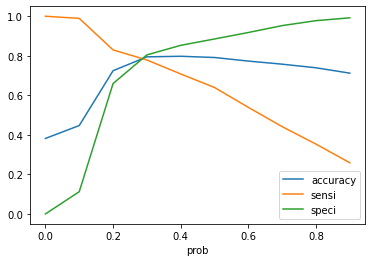

In [120]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

plt.show()

**So we have got the optimal cutoff as 0.23**

In [121]:
Y_train_pred_final['Final_Predicted'] = Y_train_pred_final.Predicted_Converted_Prob.map( lambda x: 1 if x > 0.23 else 0)

Y_train_pred_final.head()

,Prospect ID,Actual_Converted,Predicted_Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
5182,031ff09b-ea97-4a95-a03e-8dae56dd8f8d,0,0.124912,0,1,1,0,0,0,0,0,0,0,0,0
8469,fa22777e-b1e3-4141-baf7-d8abc2efcb73,0,0.053464,0,1,0,0,0,0,0,0,0,0,0,0
8382,1c1c215f-115b-445d-b30c-d31361b9ec6e,0,0.642091,1,1,1,1,1,1,1,1,0,0,0,1
8031,daae83bb-59b6-4acb-94c8-f2ef2b548d99,0,0.224224,0,1,1,1,0,0,0,0,0,0,0,0
6712,ff292035-b1f0-409e-94f3-a5149d72bf0b,1,0.995251,1,1,1,1,1,1,1,1,1,1,1,1


#### 5.10.2 Plotting the ROC Curve

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [122]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    
    plt.show()

    return None

In [123]:
fpr, tpr, thresholds = metrics.roc_curve( Y_train_pred_final.Actual_Converted, Y_train_pred_final.Predicted_Converted_Prob, drop_intermediate = False )

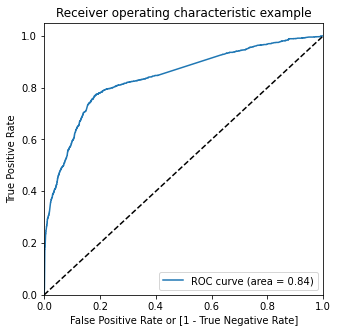

In [124]:
# drawing ROC curve
draw_roc(Y_train_pred_final.Actual_Converted, Y_train_pred_final.Predicted_Converted_Prob)

**The ROC Curve should be a value close to 1. We have got a value of 0.84 indicating a good predictive model.**

#### 5.10.3 Getting the Accuracy

In [125]:
# Let's check the overall accuracy.
metrics.accuracy_score(Y_train_pred_final.Actual_Converted, Y_train_pred_final.Final_Predicted)

0.7609876543209877

**Accuracy is around 76 % which is good. However we will also need to calculate the other metrics as we cannot depend only on the accuracy metric. We dont have very balanced data set. We need to predict all hot leads correctly, so we have to get higher sensitivity.**

In [126]:
# Getting confusion matrix
confusion2 = metrics.confusion_matrix(Y_train_pred_final.Actual_Converted, Y_train_pred_final.Final_Predicted )
confusion2

array([[2743, 1013],
       [ 439, 1880]], dtype=int64)

#### 5.10.4 Metrics beyond simply accuracy

In [127]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [128]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8106942647692971

**We have got a good sensitivity. Only 81% leads have been identified correctly as being the hot leads.**

In [129]:
# Let us calculate specificity
TN / float(TN+FP)

0.7302981895633652

**We have achieved a good specificty. 73 % leads have been identified correctly as not being the hot leads.**

In [130]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.2697018104366347


**False postive rate is just 26 %. So only 26 % of leads have been identified as hot leads despite being cold leads.**

In [131]:
# positive predictive value 
print (TP / float(TP+FP))

0.649844452125821


**So 64 % of the leads have been identified correctly as hot leads, out of all predicted hot leads.**

In [132]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8620364550597108


**So 86 % of the leads have been identified correctly as cold leads , out of all predicted cold leads.**

#### 5.5.4 Calcualting other Metrics - Precision and Recall

In [133]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(Y_train_pred_final.Actual_Converted, Y_train_pred_final.Final_Predicted )
confusion

array([[2743, 1013],
       [ 439, 1880]], dtype=int64)

In [134]:
# precision

precision_score(Y_train_pred_final.Actual_Converted, Y_train_pred_final.Final_Predicted )

0.649844452125821

**We have got a precisiosn score of 65 %**

In [135]:
recall_score(Y_train_pred_final.Actual_Converted, Y_train_pred_final.Final_Predicted )

0.8106942647692971

**We have got a recall score of 81 %**

#### 5.10.5 Precision and recall tradeoff

In [136]:
p, r, thresholds = precision_recall_curve(Y_train_pred_final.Actual_Converted, Y_train_pred_final.Predicted_Converted_Prob)

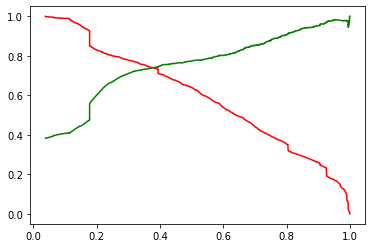

In [137]:
# Plotting precision recall trade off
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

**We have got the cutoff probability between 0.2 and 0.4**

#### 5.10.6 Calculating feature importance

In [138]:
#Selecting the coefficients of the selected features from our final model excluding the intercept
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Do Not Email                                           -1.17
Total Time Spent on Website                             1.03
Lead Origin_Landing Page Submission                    -0.77
Lead Source_Google                                      0.33
Lead Source_Olark Chat                                  0.85
Lead Source_Organic Search                              0.32
Lead Source_Reference                                   3.80
Lead Source_Welingak Website                            7.02
What is your current occupation_Working Professional    2.69
Specialization_Others                                  -1.10
dtype: float64

In [139]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                                           -16.64
Total Time Spent on Website                             14.69
Lead Origin_Landing Page Submission                    -11.04
Lead Source_Google                                       4.72
Lead Source_Olark Chat                                  12.13
Lead Source_Organic Search                               4.51
Lead Source_Reference                                   54.09
Lead Source_Welingak Website                           100.00
What is your current occupation_Working Professional    38.31
Specialization_Others                                  -15.70
dtype: float64

In [140]:
#Sorting the feature variables based on their relative coefficient values
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Do Not Email                                            0
Total Time Spent on Website                             9
Lead Origin_Landing Page Submission                     2
Lead Source_Google                                      5
Lead Source_Olark Chat                                  3
Lead Source_Organic Search                              4
Lead Source_Reference                                   1
Lead Source_Welingak Website                            8
What is your current occupation_Working Professional    6
Specialization_Others                                   7
dtype: int64

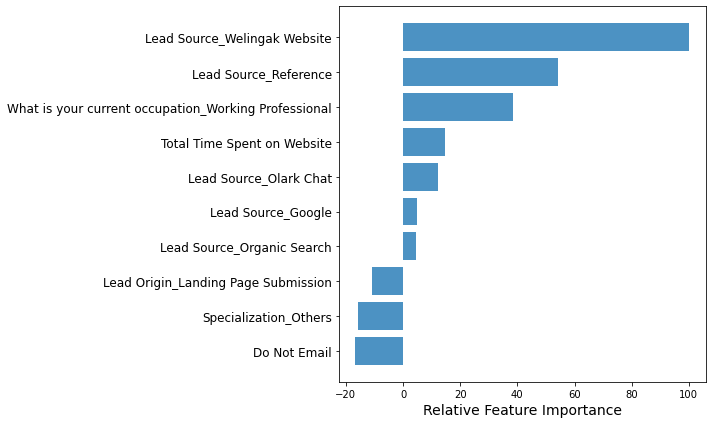

In [141]:
#Plot showing the feature variables based on their relative coefficient values
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:blue',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

In [142]:
#Selecting Top 3 features which contribute most towards the probability of a lead getting converted
df = pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)
df.rename(columns={0: 'Importance'},inplace = True)
df.head()

,index,Importance
7,Lead Source_Welingak Website,100.00
6,Lead Source_Reference,54.09
8,What is your current occupation_Working Profes...,38.31


### 6. Calculating Lead score for train data set

In [143]:
# Now let us calculate the lead score
Y_train_pred_final['Lead Score'] = Y_train_pred_final.Predicted_Converted_Prob.map(lambda x: round(x*100))
Y_train_pred_final.head()

,Prospect ID,Actual_Converted,Predicted_Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted,Lead Score
5182,031ff09b-ea97-4a95-a03e-8dae56dd8f8d,0,0.12,0,1,1,0,0,0,0,0,0,0,0,0,12
8469,fa22777e-b1e3-4141-baf7-d8abc2efcb73,0,0.05,0,1,0,0,0,0,0,0,0,0,0,0,5
8382,1c1c215f-115b-445d-b30c-d31361b9ec6e,0,0.64,1,1,1,1,1,1,1,1,0,0,0,1,64
8031,daae83bb-59b6-4acb-94c8-f2ef2b548d99,0,0.22,0,1,1,1,0,0,0,0,0,0,0,0,22
6712,ff292035-b1f0-409e-94f3-a5149d72bf0b,1,1.00,1,1,1,1,1,1,1,1,1,1,1,1,100


#### 6.1 Checking if 80% cases are correctly predicted based on the converted column

In [144]:
# checking if 80% cases are correctly predicted based on the converted column.

checking_df = Y_train_pred_final.loc[Y_train_pred_final['Actual_Converted']==1,['Actual_Converted','Final_Predicted']]
checking_df['Final_Predicted'].value_counts()

1    1880
0     439
Name: Final_Predicted, dtype: int64

In [145]:
# checking the precentage of final_predicted conversions

1880/float(1880+439)

0.8106942647692971

**Hence we can see that the final prediction has 81% of conversion rate, as per the X Educations CEO's requirement . Hence this is a good model.**

### 7. Making predictions on the test set

#### 7.1 Scaling the numerical features of the Test data set

In [146]:
# Scaling the numerical features of test data set
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

#### 7.2  Getting the same features as used while training train data set

In [147]:
#getting the same features as used while training train data set
X_test = X_test[col]

# Getting top 5 rows
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Welingak Website,What is your current occupation_Working Professional,Specialization_Others
475,0,-0.87,0,0,0,0,1,0,0,1
2461,0,-0.87,0,0,0,0,0,1,0,1
1890,0,-0.56,0,1,0,0,0,0,0,1
6007,0,-0.70,0,0,1,0,0,0,0,0
4052,0,-0.60,1,0,0,0,0,0,0,0


In [148]:
# Adding constant to the Test dataset
X_test_sm = sm.add_constant(X_test)

#### 7.3 Making predictions on the test dataset

In [149]:
# predicitng conversion for test dataset
y_test_pred = res.predict(X_test_sm)

In [150]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [151]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(Y_test)

In [152]:
# Putting LeadId to index

y_test_df['Prospect ID'] = Test_leads_Prospect_Id

In [153]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [154]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [155]:
# Getting top 5 rows
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4e8dd3c0-893e-4244-99d8-cdca0408addc,0.80
1,1,1c63b791-7209-42fb-8a16-d26409dda99e,0.99
2,0,516cd1cf-e3d1-40fa-8332-be9338e3fc5c,0.15
3,0,dd8b121c-bfe3-4e40-99c1-002f37d849f6,0.44
4,0,01f148b8-7c05-4970-9dac-7d683d7e0299,0.15


In [156]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Predicted_Converted_Prob'})

In [157]:
# Rearranging the columns

y_pred_final = y_pred_final[['Prospect ID','Converted','Predicted_Converted_Prob']]

In [158]:
# Getting the top 5 rows of the dataframe
y_pred_final.head()

,Prospect ID,Converted,Predicted_Converted_Prob
0,4e8dd3c0-893e-4244-99d8-cdca0408addc,1,0.80
1,1c63b791-7209-42fb-8a16-d26409dda99e,1,0.99
2,516cd1cf-e3d1-40fa-8332-be9338e3fc5c,0,0.15
3,dd8b121c-bfe3-4e40-99c1-002f37d849f6,0,0.44
4,01f148b8-7c05-4970-9dac-7d683d7e0299,0,0.15


In [159]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.23%

y_pred_final['Final_Predicted'] = y_pred_final.Predicted_Converted_Prob.map(lambda x: 1 if x > 0.23 else 0)

In [160]:
# Getting top 5 row of the dataframe
y_pred_final.head()

,Prospect ID,Converted,Predicted_Converted_Prob,Final_Predicted
0,4e8dd3c0-893e-4244-99d8-cdca0408addc,1,0.80,1
1,1c63b791-7209-42fb-8a16-d26409dda99e,1,0.99,1
2,516cd1cf-e3d1-40fa-8332-be9338e3fc5c,0,0.15,0
3,dd8b121c-bfe3-4e40-99c1-002f37d849f6,0,0.44,1
4,01f148b8-7c05-4970-9dac-7d683d7e0299,0,0.15,0


### 8. Calculating Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity on test set

#### 8.1 Calculating overall accuracy

In [161]:
# Let's check the accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.7484639016897081

**We have got 75 % accuracy on test data, which is very close to train data accuracy**

#### 8.2 Calculating confusion matrix

In [162]:
# Getting the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted)
confusion2

array([[1146,  445],
       [ 210,  803]], dtype=int64)

In [163]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#### 8.4 Calculting Sensitivity and Specificity for Test data set

In [164]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.792694965449161

**We have got 79 % sensitivity on test data, which is very close to train data sensitivity**

In [165]:
# Let us calculate specificity
TN / float(TN+FP)

0.7203016970458831

**We have got 72 % specificity on test data, which is very close to train data specificity**

#### 8.5 Calculating Precision and Recall metrics for the test set

In [166]:
# precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.Final_Predicted))

# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.Final_Predicted))

precision  0.6434294871794872
recall  0.792694965449161


**We have got 64 % precision on test data, which is very close to train data precision**

**We have got 79 % recall on test data, which is very close to train data recall**

### 9. Calculating Lead score for test data set

In [167]:
# Now let us calculate the lead score

y_pred_final['Lead Score'] = y_pred_final.Predicted_Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Predicted_Converted_Prob,Final_Predicted,Lead Score
0,4e8dd3c0-893e-4244-99d8-cdca0408addc,1,0.80,1,80
1,1c63b791-7209-42fb-8a16-d26409dda99e,1,0.99,1,99
2,516cd1cf-e3d1-40fa-8332-be9338e3fc5c,0,0.15,0,15
3,dd8b121c-bfe3-4e40-99c1-002f37d849f6,0,0.44,1,44
4,01f148b8-7c05-4970-9dac-7d683d7e0299,0,0.15,0,15


#### 9.1 Checking if 80% cases are correctly predicted based on the converted column

In [168]:
# checking if 80% cases are correctly predicted based on the converted column.


checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','Final_Predicted']]
checking_test_df['Final_Predicted'].value_counts()

1    803
0    210
Name: Final_Predicted, dtype: int64

In [169]:
# check the precentage of final_predicted conversions on test data

803/float(803+210)

0.792694965449161

**Hence we can see that the final prediction of conversions have a target rate of 79 % for test data.**

### 10. Comparing Train and Test model evaluation

Final Observation:
    
Let us compare the values obtained for Train & Test dataset:

**Train Data:**

- Accuracy    : 76.10%

- Sensitivity : 81.07%

- Specificity : 73.03% 

- Precision   : 64.98%

- Train conversion percentage : 81.07%

**Test Data:**:

- Accuracy    : 74.85%

- Sensitivity : 79.27%

- Specificity : 72.03%

- Precision   : 64.34%

- Test conversion percentage : 79.27%

**So Our model is a good predictive model. It has got test metrics very close to train metrics.**

### 11. Adding lead score as feature  to Lead dataset

In [170]:
# Creating the dataframe with 'Prospect ID' and 'Lead Score' for both train and test dataset

train_final = Y_train_pred_final[['Prospect ID','Lead Score']]
test_final = y_pred_final[['Prospect ID','Lead Score']]

In [171]:
# Appending test_final dataset to train_dataset to final_df

final_df = train_final.append(test_final)

# Getting the shape of final_df
final_df.shape

(8679, 2)

In [172]:
# Getting the top 5 rows of final_df
final_df

,Prospect ID,Lead Score
5182,031ff09b-ea97-4a95-a03e-8dae56dd8f8d,12
8469,fa22777e-b1e3-4141-baf7-d8abc2efcb73,5
8382,1c1c215f-115b-445d-b30c-d31361b9ec6e,64
8031,daae83bb-59b6-4acb-94c8-f2ef2b548d99,22
6712,ff292035-b1f0-409e-94f3-a5149d72bf0b,100
...,...,...
2599,2fd27c5c-fc54-4912-a296-0860dbe9ea0c,62
2600,78a2698a-c164-4b9c-9130-2cd9607c0caf,37
2601,a303766c-f688-4908-bda8-5fc6d8a35bb8,45
2602,8f781d80-91ee-4d14-a069-16eb9e8beb20,86


**So , Finally we have achieved the goal of the project,have assigned the lead score to each lead who have unique Prospect ID. This can be used by Sales team to identify the hot leads who have good lead scores.**